<a href="https://colab.research.google.com/github/tulashiprasad/pytorch/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3:"fitting the model to data (training)",
    4:"making predictions and evaluating a model (inference)",
    5:"saving and loading a model",
    6:"putting it all together"
}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check the pytorch version
torch.__version__

'2.6.0+cu124'

## 1. Data(preparing and loading)

Data can be almost anyting ... in machine learning.
* Excel spreadsheet
* Images of any king
* Videos
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical represena tation

To showcase this let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight like wiith know *known* **parameters**

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Create a training and test set with our data


In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualize data

In [ ]:
def plot_predictions(train_data=X_train,
                      train_label=y_train,
                      test_data=X_test,
                      test_label=y_test,
                      predictions=None):
   """
   Plots training data, test data and compares predictions.
   """

   plt.figure(figsize=(10, 7))

   # Plot training data in blue
   plt.scatter(train_data, train_label, c="b", label="Training data")

   # Plot test data in green
   plt.scatter(test_data, test_label, c="g", label="Testing data")

   # Are there predictions?
   if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # # Show the legend
   plt.legend(prop={"size":14})


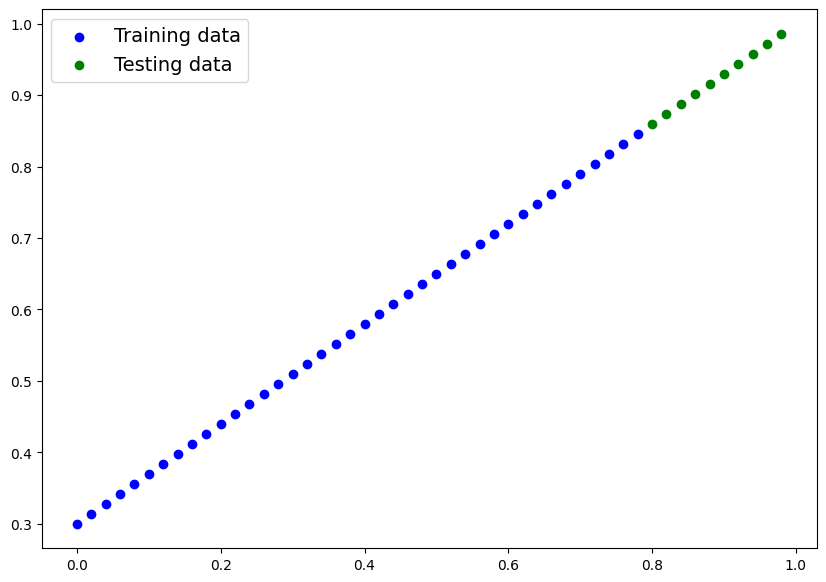

In [ ]:
plot_predictions()

## Build model

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the rendom values to bette represant (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation


In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almose everything in pytorch inherits from nn.Model
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,  # start with random weight and try to adnust it to the ideal weight
                                            requires_grad=True, # tracks the gradiant(slope) used gradiant decent in backgrond for us
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1, # start with random bias and try to adnust it to the ideal bias
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
      return self.weights * x + self.bias # This is the linear regression formuls

### PyTorch model building essentials

* torch.nn -> contains all the building blocks for computational graphs ( a newural network can be considered computational graph)
* torch.nn.Paramete -> what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.module -> is a base class for all neural networks, if you subclass it, youshould orverwrite forward()
* torch.optim -> this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() -> all nn.Module sublcasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside..
So we cna check our model parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random see, so that the weight and bias do not change on evry run
torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Making predictions using torch.inference_mode()
to check our model's predictive power, let's see how well it predicts y_test based on x_test

When we pass data trhough our model, it's going to run it through the `forward()` mehtod

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

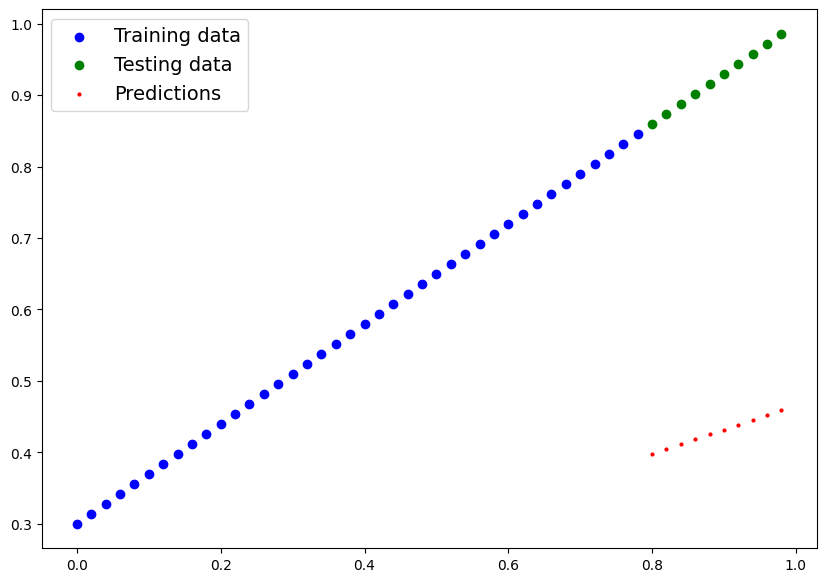

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train  model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a pror represantation to a better representation of the data

One way to measure how poor or how wrong your model's predictions are to use a loss funcion.

Things we need to train:

* Note: Loss functions may also be called as cost fundion or criterion in different areas. For out case, we're going to refer to it as a loss funcion

* **Loss function:** A function to measure how wrong your model's predictions are to the idea outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weight and bias) to imporve loss.


  * Inside the optimizer you'll often have to set tow parameters:
    * `params` - the model parameters you'd like to optimize, for exampl `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperpapameter that defines how big/small the optimizer changes the parameters withy each setp ( a small `lr` results in small changes, a large `lr` results in large chagnes)


And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Checkout our mode's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer  = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # lr = learning rate = possibly the most important hyperparameter you can set


### Building a training   (and testing loop) loop in PyTorch

A. Couple of things we need in a training loop:
0. Loop through the data
1. Fowward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate teh loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of out model with respect to the loss  (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data ...(this is a hyperparameter because we've set ti ourserlves)
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

### Training
for epoch in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to requrie gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how this optimizer changes will accumulate through the loop so , we have to zero them above in step3 for the next iteration of the loop

  ### Testing
  model_0.eval() #  turns off different settings in the model not needed for evaluation/testing
  # with torch.no_grad(): you may also see torch.no_grad() in older PyTorch code
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print what is happening

  if epoch  % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print out model_state_dict()

  # print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

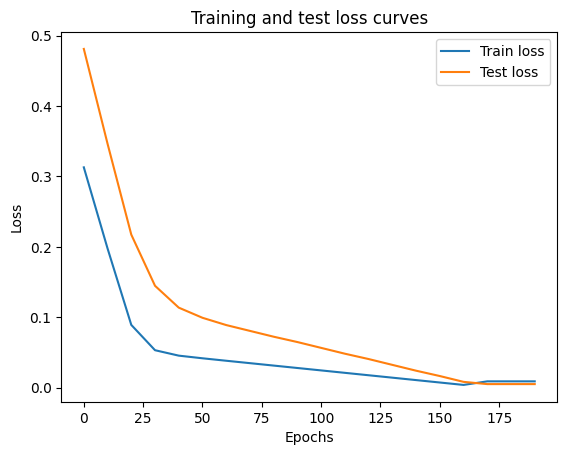

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

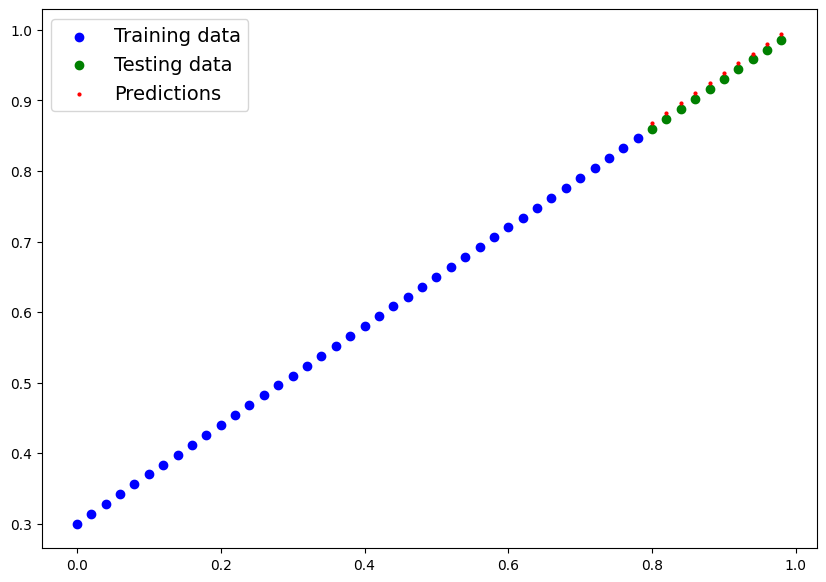

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Sae the model state dict

print(f" Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH  )

 Saving model to : models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of out model class
loaded_model_0 = LinearRegressionModel()

# Load the saved  state_dict of model_0 (this will update the new instance with updated prams)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some model preds with originoal model

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare the preds of saved model and origional model
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Lets recap what we have done

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'2.6.0+cu124'

## Setup device agnostic code

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Prepare Data

In [ ]:
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Train, Test split

In [ ]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize

In [ ]:
# Make a plot predictions function

def plot_predictions(train_data = X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

  if predictions is not None:
    # Plot predicions in red color
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

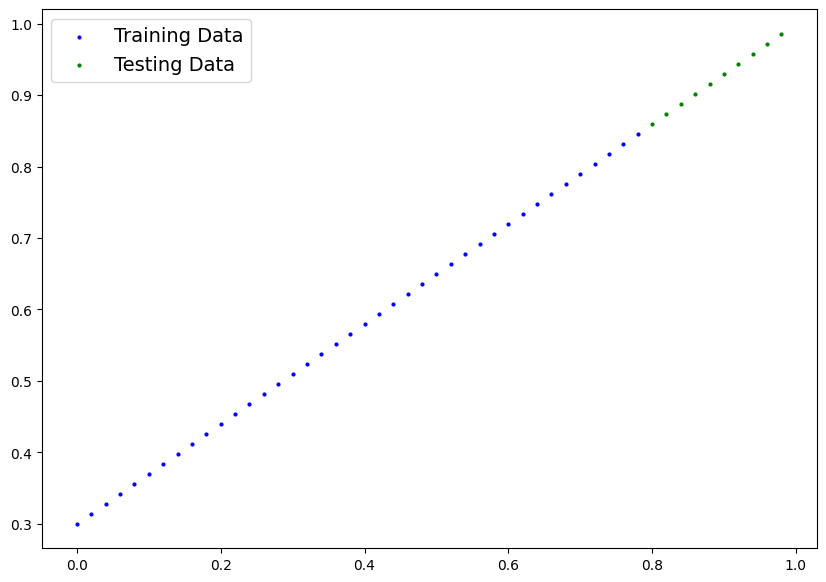

In [ ]:
# Visualize the data

plot_predictions()

## Build a model

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # automatically registered as a learnable parameter of a torch.nn.Module
    self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Forward defines the computation in the logic
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return x * self.weight + self.bias

In [ ]:
# Set manual seed since nn  Parameter are randomly initialized
torch.manual_seed(42)

recap_model = LinearRegressionModel()

# List named parameters
recap_model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Predictions

In [ ]:
with torch.inference_mode():
  recap_preds = recap_model(X_test)

In [ ]:
recap_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
recap_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## Visualize, Visualize, Visualize

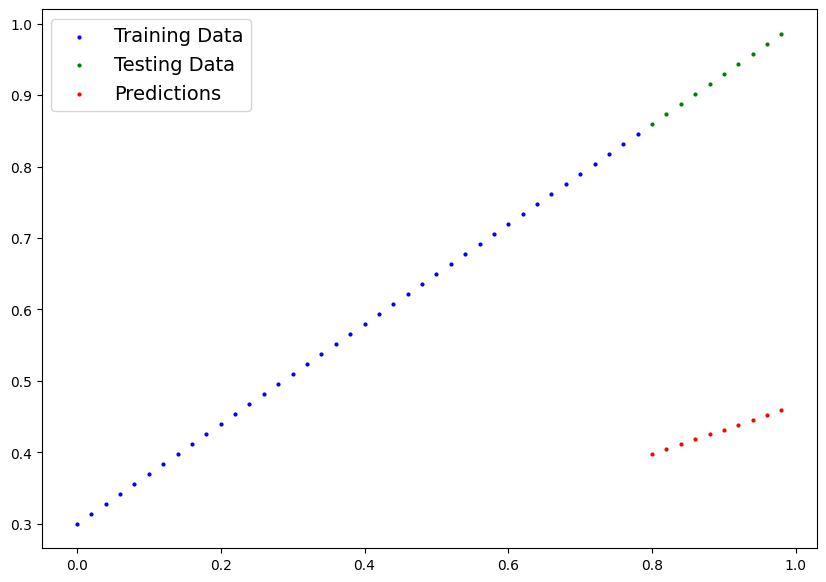

In [ ]:
plot_predictions(predictions=recap_preds)

## Train The model

In [ ]:
# Create a loss function
loss_fn = nn.L1Loss() # MAE loss

# Create the optimizer
optimizer = torch.optim.SGD(params=recap_model.parameters(), lr=0.01)

## Training loop

In [ ]:
epochs = 250
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  #### Training #####
  # Put the model in training mode
  recap_model.train()

  # 1. Forward pass
  recap_pred = recap_model(X_train)

  # 2. Calcualte the loss
  train_loss = loss_fn(recap_pred, y_train)
  # print(loss)
  # Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  train_loss.backward()

  # 5. Progress the optimizer
  optimizer.step()

  #### Testing ####

  # Put the model in evaluatin mode
  recap_model.eval()

  with torch.inference_mode():
    # Do the forward pass
    recap_test_pred = recap_model(X_test)

    # Calculate the loss
    test_loss = loss_fn(recap_test_pred, y_test.type(torch.float))

  # Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}, Train Loss: {train_loss}, Test Loss:{test_loss}")




Epoch: 0, Train Loss: 0.31288138031959534, Test Loss:0.48106518387794495
Epoch: 10, Train Loss: 0.1976713240146637, Test Loss:0.3463551998138428
Epoch: 20, Train Loss: 0.08908725529909134, Test Loss:0.21729660034179688
Epoch: 30, Train Loss: 0.053148526698350906, Test Loss:0.14464017748832703
Epoch: 40, Train Loss: 0.04543796554207802, Test Loss:0.11360953003168106
Epoch: 50, Train Loss: 0.04167863354086876, Test Loss:0.09919948130846024
Epoch: 60, Train Loss: 0.03818932920694351, Test Loss:0.08886633068323135
Epoch: 70, Train Loss: 0.03476089984178543, Test Loss:0.0805937647819519
Epoch: 80, Train Loss: 0.03132382780313492, Test Loss:0.07232122868299484
Epoch: 90, Train Loss: 0.02788739837706089, Test Loss:0.06473556160926819
Epoch: 100, Train Loss: 0.024458957836031914, Test Loss:0.05646304413676262
Epoch: 110, Train Loss: 0.021020207554101944, Test Loss:0.04819049686193466
Epoch: 120, Train Loss: 0.01758546568453312, Test Loss:0.04060482233762741
Epoch: 130, Train Loss: 0.0141553934

## Visualizer, Visualize, Visualize (Train loss curvs VS Test loss curve)

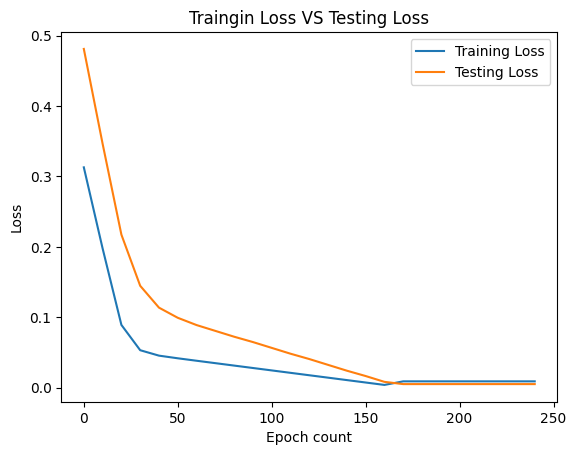

In [ ]:

# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values)), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Traingin Loss VS Testing Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch count")
plt.legend()

In [ ]:
# Find out model's learned parameters
print("The model learned the following parameters weights and biases")
print(recap_model.state_dict())
print("The original values for weights and biases are")
print(weight, bias)

The model learned the following parameters weights and biases
OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
The original values for weights and biases are
0.7 0.3


 ## Make predictions with recap model

In [ ]:
with torch.inference_mode():
  recap_preds_new = recap_model(X_test)

recap_preds_new, y_test

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

## Visualize the new prediction

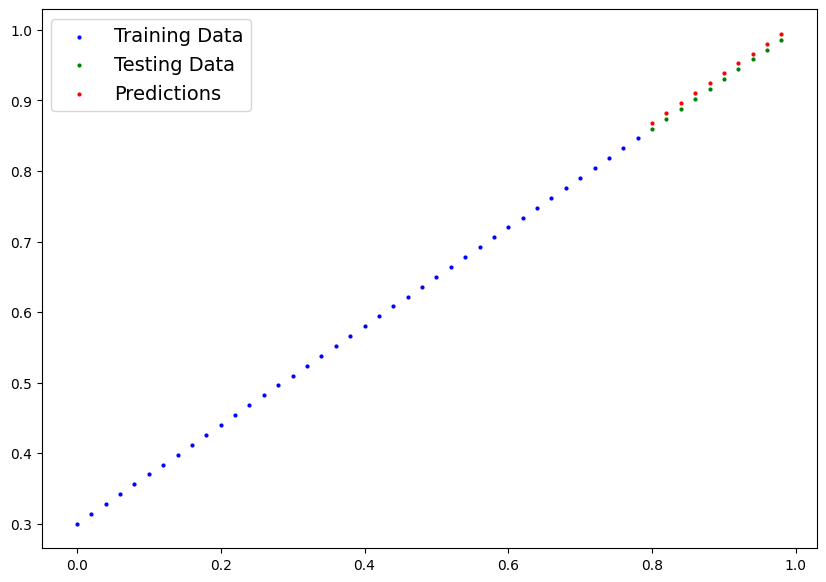

In [ ]:
plot_predictions(predictions=recap_preds_new)